In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [2]:
df = spark.read.csv("accepted_2007_to_2018Q4.csv",header=True)

In [3]:
df.describe().toPandas()

,summary,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,count,2260701,0,2260668,2260668,2260668,2260668,2260668,2260668,2260668,...,10918,10918,2260413,2260475,34348,34331,34308,34284,34270,34266
1,mean,8.032205972323003E7,None,15046.931227849467,15041.664056818605,15023.437745306326,None,13.092829115115324,445.80682288154975,None,...,11636.883941559037,193.9943207840982,None,None,None,None,None,5010.623941597316,47.78073820995767,13.191706818513651
2,stddev,4.4985611312901564E7,None,9190.245488232755,9188.413022381976,9192.331678793576,None,4.832138364571108,267.1735346084259,None,...,7625.98828115293,198.6294958183679,None,None,None,None,None,3693.1689736660164,7.311602282195859,8.159787347869285
3,min,1000007,None,1000.0,1000.0,0.0,36 months,10.0,100.0,A,...,10008.88,0.01,Cash,Cash,Apr-2013,ACTIVE,Apr-2013,1000.0,0.2,0.0
4,max,Total amount funded in policy code 2: 873652739,None,9975.0,9975.0,9999.99296019743,60 months,9.99,999.99,G,...,N,N,N,Y,Sep-2018,N,Sep-2018,N,Y,N


In [4]:
df_new = df.select('loan_amnt','term','int_rate','installment','sub_grade','emp_length','home_ownership','annual_inc',\
           'verification_status','issue_d','loan_status','purpose','addr_state','dti','earliest_cr_line','fico_range_low',\
          'fico_range_high','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type',\
          'mort_acc','pub_rec_bankruptcies')

In [5]:
df_new.printSchema()

root
 |-- loan_amnt: string (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: string (nullable = true)
 |-- installment: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- earliest_cr_line: string (nullable = true)
 |-- fico_range_low: string (nullable = true)
 |-- fico_range_high: string (nullable = true)
 |-- open_acc: string (nullable = true)
 |-- pub_rec: string (nullable = true)
 |-- revol_bal: string (nullable = true)
 |-- revol_util: string (nullable = true)
 |-- total_acc: string (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- application_typ

In [6]:
df_new = df_new.filter("loan_status == 'Fully Paid' or loan_status == 'Charged Off'")

In [7]:
from pyspark.sql.functions import count, when, isnull

In [8]:
nacounts = df_new.select([count(when(isnull(c), c)).alias(c) for c in df_new.columns]).toPandas()
nacounts.transpose()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
sub_grade,0
emp_length,78511
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [9]:
df_new = df_new.dropna()

In [10]:
df_new = df_new.dropDuplicates()

In [11]:
from pyspark.sql.functions import mean,stddev,col,udf,stddev_pop
import pyspark.sql.functions as F
import pyspark.sql.types as t

In [12]:
df_vis = df_new.select(df_new.loan_amnt.cast("float").alias('loan_amnt'), 
              df_new.int_rate.cast("float").alias('int_rate'), 
              df_new.installment.cast("float").alias('installment'), 
              df_new.annual_inc.cast("float").alias('annual_inc'), 
              df_new.dti.cast("float").alias('dti'), 
              df_new.fico_range_low.cast("float").alias('fico_range_low'), 
              df_new.fico_range_high.cast("float").alias('fico_range_high'), 
              df_new.open_acc.cast("float").alias('open_acc'), 
              df_new.pub_rec.cast("float").alias('pub_rec'), 
              df_new.revol_bal.cast("float").alias('revol_bal'), 
              df_new.revol_util.cast("float").alias('revol_util'), 
              df_new.total_acc.cast("float").alias('total_acc'), 
              df_new.mort_acc.cast("float").alias('mort_acc'), 
              df_new.pub_rec_bankruptcies.cast("float").alias('pub_rec_bankruptcies')
              ).toPandas()

Text(0.5, 1.0, 'Check the outliers')

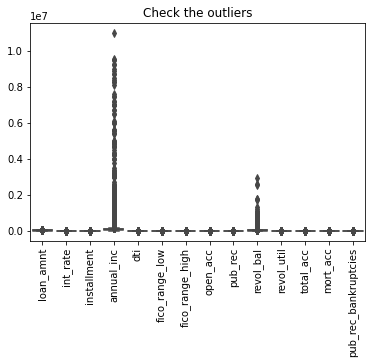

In [13]:
sns.boxplot(data=df_vis)
plt.xticks(rotation=90)
plt.title('Check the outliers')

In [14]:
df_test = df_new.filter("annual_inc < 200000 and revol_bal < 60000")

Text(0.5, 1.0, 'Check the outliers')

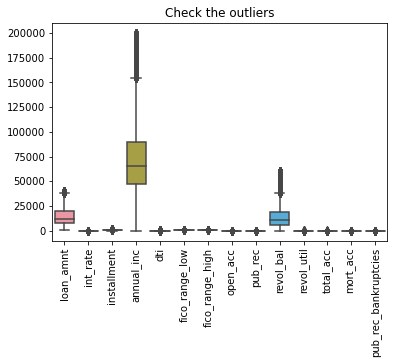

In [15]:
df_vis = df_test.select(df_test.loan_amnt.cast("float").alias('loan_amnt'), 
              df_test.int_rate.cast("float").alias('int_rate'), 
              df_test.installment.cast("float").alias('installment'), 
              df_test.annual_inc.cast("float").alias('annual_inc'), 
              df_test.dti.cast("float").alias('dti'), 
              df_test.fico_range_low.cast("float").alias('fico_range_low'), 
              df_test.fico_range_high.cast("float").alias('fico_range_high'), 
              df_test.open_acc.cast("float").alias('open_acc'), 
              df_test.pub_rec.cast("float").alias('pub_rec'), 
              df_test.revol_bal.cast("float").alias('revol_bal'), 
              df_test.revol_util.cast("float").alias('revol_util'), 
              df_test.total_acc.cast("float").alias('total_acc'), 
              df_test.mort_acc.cast("float").alias('mort_acc'), 
              df_test.pub_rec_bankruptcies.cast("float").alias('pub_rec_bankruptcies')
              ).toPandas()
sns.boxplot(data=df_vis)
plt.xticks(rotation=90)
plt.title('Check the outliers')

In [16]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [17]:
categorical = ['term','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state',\
              'initial_list_status','application_type']

In [18]:
#One-hot encoding
from pyspark.ml import Pipeline
stage_string = [StringIndexer(inputCol= c, outputCol= c+"_string_encoded") for c in categorical]
stage_one_hot = [OneHotEncoder(inputCol= c+"_string_encoded", outputCol= c+ "_one_hot") for c in categorical]

ppl = Pipeline(stages= stage_string + stage_one_hot)
df_test2 = ppl.fit(df_test).transform(df_test)

In [19]:
df_test2.printSchema()

root
 |-- loan_amnt: string (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: string (nullable = true)
 |-- installment: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- earliest_cr_line: string (nullable = true)
 |-- fico_range_low: string (nullable = true)
 |-- fico_range_high: string (nullable = true)
 |-- open_acc: string (nullable = true)
 |-- pub_rec: string (nullable = true)
 |-- revol_bal: string (nullable = true)
 |-- revol_util: string (nullable = true)
 |-- total_acc: string (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- application_typ

Text(0.5, 1.0, 'Correlation each variables')

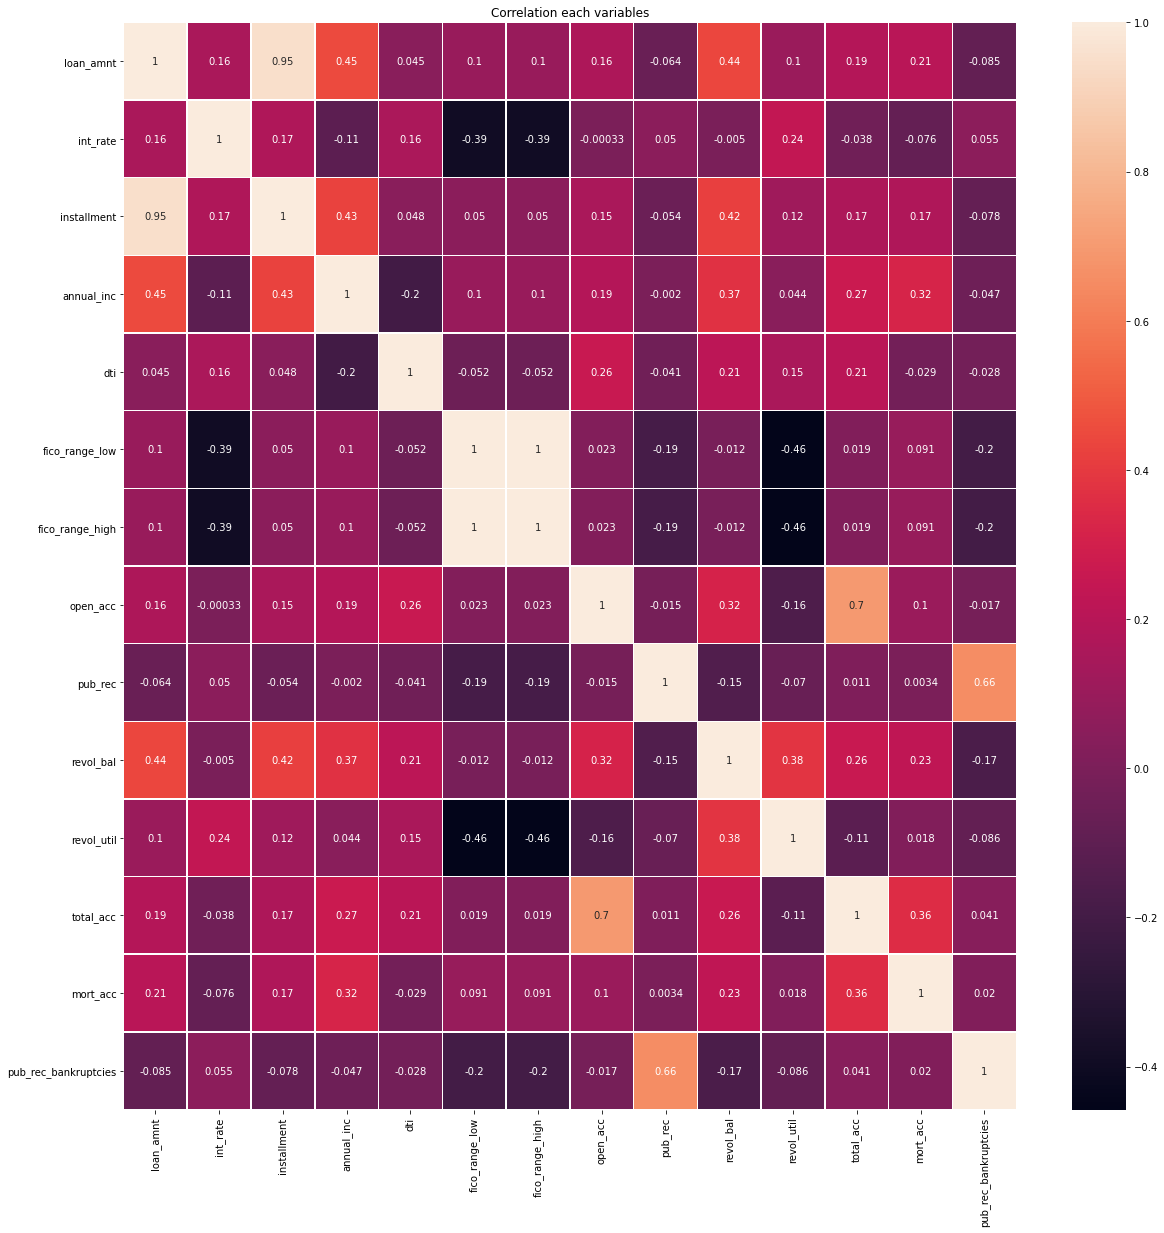

In [20]:
corr = df_vis.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=0.5, ax =ax)
plt.title("Correlation each variables")

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
def multicollinearity(df):
    vif_data = pd.DataFrame()
    vif_data['IndependVariables'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                       for i in range(len(df.columns))]
    vif_data = vif_data.sort_values('VIF', ascending = False)
    while vif_data['VIF'].iloc[0] > 10:
        maxName = vif_data.iloc[0]
        df = df.drop([maxName.IndependVariables],axis = 1)
        vif_data = pd.DataFrame()
        vif_data['IndependVariables'] = df.columns
        vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                           for i in range(len(df.columns))]
        vif_data = vif_data.sort_values('VIF', ascending = False)
        print(vif_data)
    return df

In [23]:
X_new=multicollinearity(df_vis)

       IndependVariables        VIF
0              loan_amnt  43.820241
2            installment  42.919804
5         fico_range_low  20.095434
6               open_acc  12.961925
10             total_acc  12.717099
1               int_rate   9.931352
3             annual_inc   9.046970
9             revol_util   7.683606
4                    dti   6.077547
8              revol_bal   4.962075
11              mort_acc   2.213248
12  pub_rec_bankruptcies   2.016074
7                pub_rec   1.995154
       IndependVariables        VIF
4         fico_range_low  20.085632
5               open_acc  12.927392
9              total_acc  12.698986
0               int_rate   9.907071
2             annual_inc   8.981767
8             revol_util   7.586494
3                    dti   6.077541
1            installment   5.709937
7              revol_bal   4.874694
10              mort_acc   2.201321
11  pub_rec_bankruptcies   2.015953
6                pub_rec   1.993950
       IndependVariables    

In [24]:
X_new.columns

Index(['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [25]:
df_final = df_test2.select(df_test2.int_rate.cast("float").alias('int_rate'),
                           df_test2.installment.cast("float").alias('installment'),
                           df_test2.annual_inc.cast("float").alias('annual_inc'),
                           df_test2.dti.cast("float").alias('dti'),
                           df_test2.open_acc.cast("float").alias('open_acc'),
                           df_test2.pub_rec.cast("float").alias('pub_rec'),
                           df_test2.revol_bal.cast("float").alias('revol_bal'),
                           df_test2.revol_util.cast("float").alias('revol_util'),
                           df_test2.mort_acc.cast("float").alias('mort_acc'),
                           df_test2.pub_rec_bankruptcies.cast("float").alias('pub_rec_bankruptcies'),
                           df_test2.term_one_hot.alias("term_vec"), 
                           df_test2.sub_grade_one_hot.alias("sub_grade_vec"), 
                           df_test2.emp_length_one_hot.alias("emp_length_vec"), 
                           df_test2.home_ownership_one_hot.alias("home_ownership_vec"), 
                           df_test2.verification_status_one_hot.alias("verification_status_vec"), 
                           df_test2.purpose_one_hot.alias("purpose_vec"), 
                           df_test2.addr_state_one_hot.alias("addr_state_vec"), 
                           df_test2.initial_list_status_one_hot.alias("initial_list_status_vec"),
                           df_test2.application_type_one_hot.alias("application_type_vec"),
                           df_test2.loan_status.alias("loan_status")
                          )

In [26]:
df_final.printSchema()

root
 |-- int_rate: float (nullable = true)
 |-- installment: float (nullable = true)
 |-- annual_inc: float (nullable = true)
 |-- dti: float (nullable = true)
 |-- open_acc: float (nullable = true)
 |-- pub_rec: float (nullable = true)
 |-- revol_bal: float (nullable = true)
 |-- revol_util: float (nullable = true)
 |-- mort_acc: float (nullable = true)
 |-- pub_rec_bankruptcies: float (nullable = true)
 |-- term_vec: vector (nullable = true)
 |-- sub_grade_vec: vector (nullable = true)
 |-- emp_length_vec: vector (nullable = true)
 |-- home_ownership_vec: vector (nullable = true)
 |-- verification_status_vec: vector (nullable = true)
 |-- purpose_vec: vector (nullable = true)
 |-- addr_state_vec: vector (nullable = true)
 |-- initial_list_status_vec: vector (nullable = true)
 |-- application_type_vec: vector (nullable = true)
 |-- loan_status: string (nullable = true)



In [27]:
df_final = df_final.replace(['Charged Off', 'Fully Paid'], ["1", "0"], 'loan_status')

In [28]:
df_final.select('loan_status').describe().show()

+-------+------------------+
|summary|       loan_status|
+-------+------------------+
|  count|           1165380|
|   mean|0.1996198664813194|
| stddev|0.3997147889256201|
|    min|                 0|
|    max|                 1|
+-------+------------------+



In [29]:
df_final.show(6)

+--------+-----------+----------+-----+--------+-------+---------+----------+--------+--------------------+-------------+---------------+--------------+------------------+-----------------------+--------------+---------------+-----------------------+--------------------+-----------+
|int_rate|installment|annual_inc|  dti|open_acc|pub_rec|revol_bal|revol_util|mort_acc|pub_rec_bankruptcies|     term_vec|  sub_grade_vec|emp_length_vec|home_ownership_vec|verification_status_vec|   purpose_vec| addr_state_vec|initial_list_status_vec|application_type_vec|loan_status|
+--------+-----------+----------+-----+--------+-------+---------+----------+--------+--------------------+-------------+---------------+--------------+------------------+-----------------------+--------------+---------------+-----------------------+--------------------+-----------+
|    5.32|     481.84|  150000.0| 1.14|     7.0|    0.0|   7195.0|       9.4|     3.0|                 0.0|(1,[0],[1.0])|(34,[14],[1.0])|(10,[4],[1.

In [30]:
sclcol = ["int_rate","installment","annual_inc","dti","open_acc","pub_rec",
          "revol_bal","revol_util","mort_acc","pub_rec_bankruptcies"]

In [31]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assembler = VectorAssembler(inputCols=sclcol, outputCol="features")

output = assembler.transform(df_final)
scaler = StandardScaler(inputCol="features", outputCol="featues_scl",
                        withStd=True, withMean=False)

df_final2 = scaler.fit(output).transform(output)

In [32]:
df_final2.printSchema()

root
 |-- int_rate: float (nullable = true)
 |-- installment: float (nullable = true)
 |-- annual_inc: float (nullable = true)
 |-- dti: float (nullable = true)
 |-- open_acc: float (nullable = true)
 |-- pub_rec: float (nullable = true)
 |-- revol_bal: float (nullable = true)
 |-- revol_util: float (nullable = true)
 |-- mort_acc: float (nullable = true)
 |-- pub_rec_bankruptcies: float (nullable = true)
 |-- term_vec: vector (nullable = true)
 |-- sub_grade_vec: vector (nullable = true)
 |-- emp_length_vec: vector (nullable = true)
 |-- home_ownership_vec: vector (nullable = true)
 |-- verification_status_vec: vector (nullable = true)
 |-- purpose_vec: vector (nullable = true)
 |-- addr_state_vec: vector (nullable = true)
 |-- initial_list_status_vec: vector (nullable = true)
 |-- application_type_vec: vector (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- featues_scl: vector (nullable = true)



In [33]:
df_new2 = df_final2.select('term_vec','sub_grade_vec','emp_length_vec','home_ownership_vec','verification_status_vec','purpose_vec',
                   'addr_state_vec','initial_list_status_vec','application_type_vec','loan_status','featues_scl')

In [34]:
df_new2.show(6)

+-------------+---------------+--------------+------------------+-----------------------+--------------+---------------+-----------------------+--------------------+-----------+--------------------+
|     term_vec|  sub_grade_vec|emp_length_vec|home_ownership_vec|verification_status_vec|   purpose_vec| addr_state_vec|initial_list_status_vec|application_type_vec|loan_status|         featues_scl|
+-------------+---------------+--------------+------------------+-----------------------+--------------+---------------+-----------------------+--------------------+-----------+--------------------+
|(1,[0],[1.0])|(34,[14],[1.0])|(10,[4],[1.0])|     (5,[0],[1.0])|          (2,[1],[1.0])|(13,[0],[1.0])| (50,[1],[1.0])|          (1,[0],[1.0])|       (1,[0],[1.0])|          0|[1.11197780530713...|
|(1,[0],[1.0])|(34,[14],[1.0])|(10,[0],[1.0])|     (5,[0],[1.0])|          (2,[1],[1.0])|(13,[0],[1.0])|(50,[13],[1.0])|              (1,[],[])|       (1,[0],[1.0])|          0|[1.11197780530713...|
|(1,[

Text(0.5, 1.0, 'Check the balance')

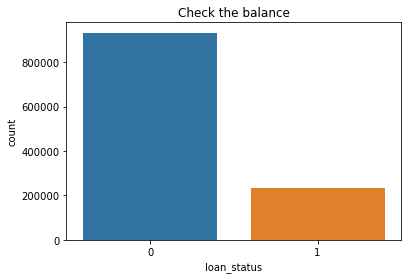

In [35]:
df_vis2 = df_new2.select(df_new2.loan_status.cast("integer").alias('loan_status')).toPandas()
sns.countplot(x='loan_status',data=df_vis2)
plt.title('Check the balance')

In [36]:
major_df = df_new2.filter(col("loan_status") == 0)
minor_df = df_new2.filter(col("loan_status") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 4


In [37]:
sampled_majority_df = major_df.sample(False, 1/ratio)
combined_df = sampled_majority_df.unionAll(minor_df)
combined_df.show(5)

+-------------+---------------+--------------+------------------+-----------------------+--------------+---------------+-----------------------+--------------------+-----------+--------------------+
|     term_vec|  sub_grade_vec|emp_length_vec|home_ownership_vec|verification_status_vec|   purpose_vec| addr_state_vec|initial_list_status_vec|application_type_vec|loan_status|         featues_scl|
+-------------+---------------+--------------+------------------+-----------------------+--------------+---------------+-----------------------+--------------------+-----------+--------------------+
|(1,[0],[1.0])|(34,[14],[1.0])|(10,[0],[1.0])|     (5,[0],[1.0])|          (2,[1],[1.0])|(13,[2],[1.0])| (50,[4],[1.0])|          (1,[0],[1.0])|       (1,[0],[1.0])|          0|[1.11197780530713...|
|(1,[0],[1.0])|(34,[14],[1.0])|(10,[0],[1.0])|     (5,[0],[1.0])|          (2,[1],[1.0])|(13,[0],[1.0])| (50,[1],[1.0])|          (1,[0],[1.0])|       (1,[0],[1.0])|          0|[1.11197780530713...|
|(1,[

Text(0.5, 1.0, 'Check the balance')

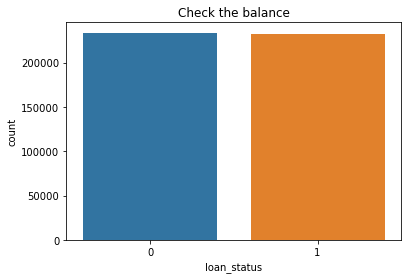

In [38]:
df_vis3 = combined_df.select(combined_df.loan_status.cast("integer").alias('loan_status')).toPandas()
sns.countplot(x='loan_status',data=df_vis3)
plt.title('Check the balance')

In [39]:
assembler_final = VectorAssembler(inputCols=['term_vec','sub_grade_vec','emp_length_vec','home_ownership_vec',
                                             'verification_status_vec','purpose_vec','addr_state_vec',
                                             'initial_list_status_vec','application_type_vec','featues_scl'],
                                  outputCol="features_final")

output = assembler_final.transform(combined_df)
df_model=output.select("features_final", "loan_status")

In [40]:
df_model.show(6)

+--------------------+-----------+
|      features_final|loan_status|
+--------------------+-----------+
|(127,[0,15,35,45,...|          0|
|(127,[0,15,35,45,...|          0|
|(127,[0,15,35,45,...|          0|
|(127,[0,15,38,45,...|          0|
|(127,[0,15,37,45,...|          0|
|(127,[0,19,35,45,...|          0|
+--------------------+-----------+
only showing top 6 rows



In [41]:
from pyspark.sql.types import IntegerType
df_model = df_model.withColumn("loan_status", df_model["loan_status"].cast('integer'))

In [42]:
df_model.show(6)

+--------------------+-----------+
|      features_final|loan_status|
+--------------------+-----------+
|(127,[0,15,35,45,...|          0|
|(127,[0,15,35,45,...|          0|
|(127,[0,15,35,45,...|          0|
|(127,[0,15,38,45,...|          0|
|(127,[0,15,37,45,...|          0|
|(127,[0,19,35,45,...|          0|
+--------------------+-----------+
only showing top 6 rows



In [43]:
train, test = df_model.randomSplit([0.8, 0.2], seed=12345)

In [44]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=100, regParam=0.15, elasticNetParam=0.8,featuresCol = 'features_final', 
                        labelCol = 'loan_status')

# Fit the model
lrModel = lr.fit(train)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Coefficients: 
1 X 127 CSRMatrix
(0,117) 0.1278
Intercept: [-0.38093178003032074]
False positive rate by label:
label 0: 0.421190930736395
label 1: 0.31989206935027037
True positive rate by label:
label 0: 0.6801079306497296
label 1: 0.578809069263605
Precision by label:
label 0: 0.6174747351759405
label 1: 0.6441244397763283
Recall by label:
label 0: 0.6801079306497296
label 1: 0.578809069263605
F-measure by label:
label 0: 0.6472797077661006
label 1: 0.6097225478261116
Accuracy: 0.6294503502354569
FPR: 0.3705333503221223
TPR: 0.6294503502354569
F-measure: 0.6284981062381263
Precision: 0.6308017315048022
Recall: 0.6294503502354569


In [45]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexer = StringIndexer(inputCol="loan_status", outputCol="indexedLabel").fit(df_model)

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="loan_status", featuresCol="features_final", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(train)

# Make predictions.
predictions = model.transform(test)


In [46]:
# Select example rows to display.
predictions.select("prediction", "loan_status", "features_final").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="loan_status", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

+----------+-----------+--------------------+
|prediction|loan_status|      features_final|
+----------+-----------+--------------------+
|       0.0|          0|(127,[0,1,35,45,5...|
|       1.0|          0|(127,[0,1,36,45,5...|
|       0.0|          0|(127,[0,1,36,46,5...|
|       0.0|          0|(127,[0,1,36,46,5...|
|       0.0|          0|(127,[0,1,37,47,5...|
+----------+-----------+--------------------+
only showing top 5 rows

Test Error = 0.362319
IndexToString_2bd33fe4e03f


In [47]:
from pyspark.ml.classification import GBTClassifier

# Train a GBT model.
gbt = GBTClassifier(labelCol="loan_status", featuresCol="features_final", maxIter=1200)

# Chain indexers and GBT in a Pipeline
pipeline_gb = Pipeline(stages=[labelIndexer, gbt])

# Train model.  This also runs the indexers.
model_gb = pipeline.fit(train)

# Make predictions.
predictions_gb = model_gb.transform(test)

# Select example rows to display.
predictions_gb.select("prediction", "loan_status", "features_final").show(5)

# Select (prediction, true label) and compute test error
evaluator_gb = MulticlassClassificationEvaluator(
    labelCol="loan_status", predictionCol="prediction", metricName="accuracy")
accuracy_gb = evaluator_gb.evaluate(predictions_gb)
print("Test Error = %g" % (1.0 - accuracy_gb))

gbtModel = model_gb.stages[2]
print(gbtModel)  # summary only

+----------+-----------+--------------------+
|prediction|loan_status|      features_final|
+----------+-----------+--------------------+
|       0.0|          0|(127,[0,1,35,45,5...|
|       1.0|          0|(127,[0,1,36,45,5...|
|       0.0|          0|(127,[0,1,36,46,5...|
|       0.0|          0|(127,[0,1,36,46,5...|
|       0.0|          0|(127,[0,1,37,47,5...|
+----------+-----------+--------------------+
only showing top 5 rows

Test Error = 0.362319
IndexToString_2bd33fe4e03f
